# Análisis de los 25 retailers más grandes de Estados Unidos

In [1]:
# Importar librerías aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importar datos aquí
df = pd.read_csv('/work/largest_us_retailers_9b00dc73-a938-46cd-af17-fcb2bd67301f.csv')
df.head(5)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

In [3]:
df_whithout_W = df.drop(0)

In [4]:
df_whithout_W.describe()

,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,24.000000,22.000000,22.000000,22.000000
mean,46602.416667,3416.227273,35.562840,0.041475
std,28317.981841,4126.358592,41.082510,0.069899
min,16592.000000,231.000000,1.563919,-0.059515
25%,23860.000000,959.000000,10.537195,-0.002790
50%,34694.000000,1800.000000,25.341845,0.026687
75%,71327.750000,3640.750000,38.598240,0.079281
max,115037.000000,14250.000000,187.795620,0.255662


In [5]:
df_whithout_W.mean()

Sales                 46602.416667
Stores                 3416.227273
Sales/Avg. Store         35.562840
Store Count Growth        0.041475
dtype: float64

# Promedio de ventas
Hay varias formas de sacarlo, arriba puedes ver dos formas diferentes de hacerlo.
Quitando a Walmart que es el claramente el lider, el promedio de ventas es de **46,602 dolares**

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

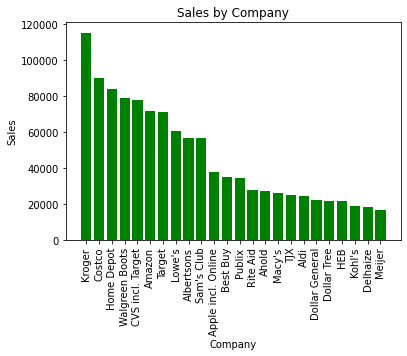

In [6]:
x = df_whithout_W['Company']
y = df_whithout_W['Sales']
plt.bar(x, y, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Company')
plt.ylabel('Sales')
plt.title('Sales by Company')
plt.show()

# Ventas de la mayoria de compañias
Al ver la grafica con las ventas de las compañia podemos darnos cuenta que la mayoria esta entre un rango de **20 mil** y **80 mil** dolares en ventas, o un rango mas exacto seria entre el Q1 y el Q3 que va desde **23,860** hasta **71,327**. Quite a Walmart de nuevo de la grafica porque arruina el entendimiento a simple vista pero tiene unas ventas de 658,119 dolares

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

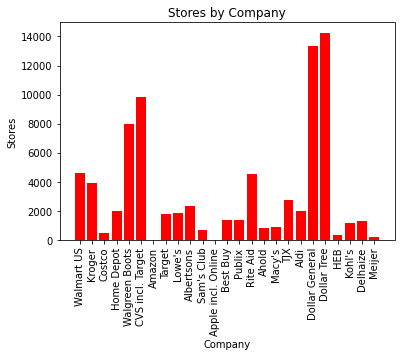

In [7]:
x = df['Company']
y = df['Stores']
plt.bar(x , y, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Company')
plt.ylabel('Stores')
plt.title('Stores by Company')
plt.show()

# Cantidad de tiendas por compañia
Me parece impresionante ver como las 2 empresas que mas tiendas tienen son de las que menos venden

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

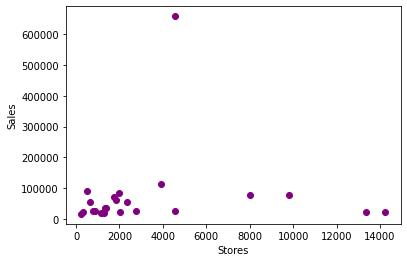

In [8]:
x = df['Stores']
y = df['Sales']
plt.scatter(x, y, color='purple')
plt.xlabel('Stores')
plt.ylabel('Sales')
plt.show()


## Relación entre cantidad de tiendas y ventas
En las dos tablas anteriores nos dimos cuenta que no necesariamente por tener mas tiendas van a vender mas. Las dos compañias que tienen mas tiendas son de las que venden menos y la compañia que vende mas tiene muchas menos tiendas

### 5. ¿Cuál es el rango que existe entre las ventas?

In [9]:
sales_min = df['Sales'].min()
sales_max = df['Sales'].max()
sales_min

16592

In [10]:
sales_max

658119

# Rango de ventas
El rango de las ventas va de **16,592** siendo el numero mas bajo en ventas hasta **658,119** siendo el numero mas alto.

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

In [11]:
asc_stores = df.sort_values('Stores',ascending=False)
asc_stores.head(5)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters


In [12]:
asc_sales = df.sort_values('Sales', ascending=False)
asc_sales.head(5)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


## Empresas que mas tiendas fisicas tienen
1. Dollar Tree
2. Dollar General
3. CVS incl. Target
4. Walgreen Boots
5. Walmart US

## Empresas que mas ventas tienen
1. Walmart US
2. Kroger
3. Costco
4. Home Depot
5. Walgreen Boots

Las empresas que estan en el top 5 de mas ventas y en el top 5 de mas tiendas fisicas son **Walmart US** y **Walgreen Boots**

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

In [13]:
df_category = df.groupby('Category')['Sales'].agg([min, max , sum])
df_category['Category'] = df_category.index

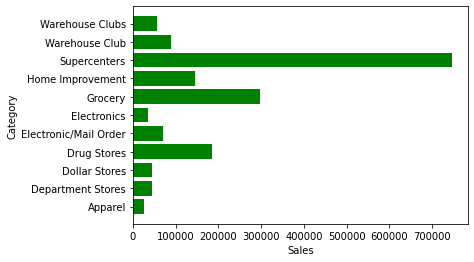

In [14]:
x = df_category['Category']
y = df_category['sum']
plt.barh(x, y, color='green')
plt.xlabel('Sales')
plt.ylabel('Category')
plt.show()

## Categoria que genero mas ventas
Claramente podemos ver que la categoria de **Supercenters** genero muchas mas ventas que las demas


### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

In [15]:
avg = df['Sales'] / df['Stores']

In [16]:
df_avg_stores = df
df_avg_stores.insert(2,'stores/avg',avg, allow_duplicates=False)

In [17]:
df_avg_stores

,Company,Sales,stores/avg,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,143.882597,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,29.264055,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,181.915152,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,42.735878,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,9.863034,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,7.927443,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,40.185102,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,32.992888,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,24.432072,2326.0,23.877731,-0.044371,Grocery


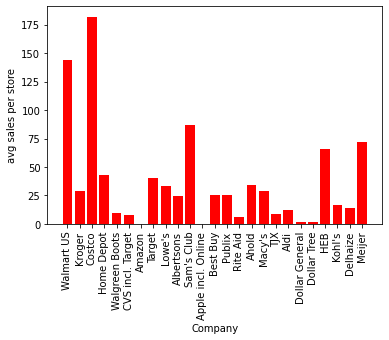

In [18]:
x = df_avg_stores['Company']
y = df_avg_stores['stores/avg']
plt.bar(x, y, color='red')
plt.xlabel('Company')
plt.ylabel('avg sales per store')
plt.xticks(rotation='vertical')
plt.show()

## Compañia con mas ventas por tienda fisica
En el dataset original esta mal calculado el promedio de ventas por tienda fisica, lo volvi a calcular para que no afectara el análisis. En la tabla podemos ver como **Costco** es la compañia con mas ventas por tienda fisica y Walmart esta muy cerca 

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

In [19]:
dic = {}
dic = pd.isnull(df['Stores'])
for llave, valor in dic.items():
    if valor == True:
        print(llave)

6
11


In [20]:
df.loc[[6, 11]]

,Company,Sales,stores/avg,Stores,Sales/Avg. Store,Store Count Growth,Category
6,Amazon,71687,NaN,NaN,NaN,NaN,Electronic/Mail Order
11,Apple incl. Online,37664,NaN,NaN,NaN,NaN,NaN


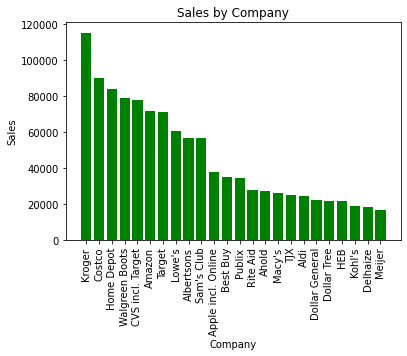

In [21]:
x = df_whithout_W['Company']
y = df_whithout_W['Sales']
plt.bar(x, y, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Company')
plt.ylabel('Sales')
plt.title('Sales by Company')
plt.show()

## Compañias que solo venden en linea
Nos podemos dar cuenta que **Amazon** y 
**Apple incl. Online** son las unicas que venden exclusivamente en linea.
Si nos fijamos en la grafica de arriba y nos enfocamos en estas compañias podemos llegar a la conclusión que no por no tener tiendas fisicas les afecta a sus ventas, porque estan en la segunda mitad de las compañias que mas venden, Amazon esta en el lugar numero 7 y Apple incl. Online en el 12.
+ En la grafica de arriba volvi a quitar a Walmart porque afecta la correcta visualización de la información pero si fue tomada en cuenta en el análisis.

## III. Tus propias preguntas

### 10. ¿Se pueden tener mas ganancias quitanto todas las tiendas fisicas para pasarse exclusivamente en linea o es mejor tener ambas?

Con toda la información que se analizo anteriormente podemos ver cual es la mejor opción, tiendas en linea, tiendas fisicas o las das juntas. Llegamos a la conclusión que no afecta a la compañia que no tengan tiendas fisicas y que tener muchas tiendas tampoco representaban mas ganancias, lo interesante es que hay una empresa que incluso la sacamos de la grafica porque afectaba la visualización por tantas ventas que tenia, esta empresa es Walmart y no solo vende en tiendas fisicas sino que desde hace ya varios años lleva invirtiendo fuertemente en el desarrollo de su Ecommerce. Sabiendo esto podemos darnos cuanta que para vender mas tienes que estar con presencencia en linea y con tiendas fisicas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6c9b6e00-bbe3-4f68-9413-6fa8149b2eba' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>